In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

In [3]:
dictionary = pd.read_csv('data-dictionary.csv')
dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [4]:
dataset = pd.read_csv('Country-data.csv')
dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# EDA

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
dataset.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
dataset[dataset["country"] == "Ukraine"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
156,Ukraine,11.7,47.1,7.72,51.1,7820,13.4,70.4,1.44,2970


Дисперсія:

In [8]:
pd.options.display.float_format = '{:.2f}'.format
dataset.var()

C:\Users\Anna\AppData\Local\Temp\ipykernel_16792\118747029.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.var()


child_mort        1626.42
exports            751.42
health               7.55
imports            586.10
income       371643894.16
inflation          111.74
life_expec          79.09
total_fer            2.29
gdpp         335941419.96
dtype: float64

Коваріація:

In [10]:
dataset.cov()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1626.42,-351.65,-22.20,-124.20,-407635.98,122.89,-318.01,51.80,-357046.31
exports,-351.65,751.42,-8.61,489.35,273094.60,-31.09,77.11,-13.28,210378.47
health,-22.20,-8.61,7.55,6.37,6861.67,-7.42,5.15,-0.82,17417.97
imports,-124.20,489.35,6.37,586.10,57128.72,-63.21,11.71,-5.83,51250.05
income,-407635.98,273094.60,6861.67,57128.72,371643894.16,-30110.12,104916.79,-14645.73,316443012.16
inflation,122.89,-31.09,-7.42,-63.21,-30110.12,111.74,-22.53,5.07,-42940.42
life_expec,-318.01,77.11,5.15,11.71,104916.79,-22.53,79.09,-10.24,97814.72
total_fer,51.80,-13.28,-0.82,-5.83,-14645.73,5.07,-10.24,2.29,-12622.33
gdpp,-357046.31,210378.47,17417.97,51250.05,316443012.16,-42940.42,97814.72,-12622.33,335941419.96


Кореляція:

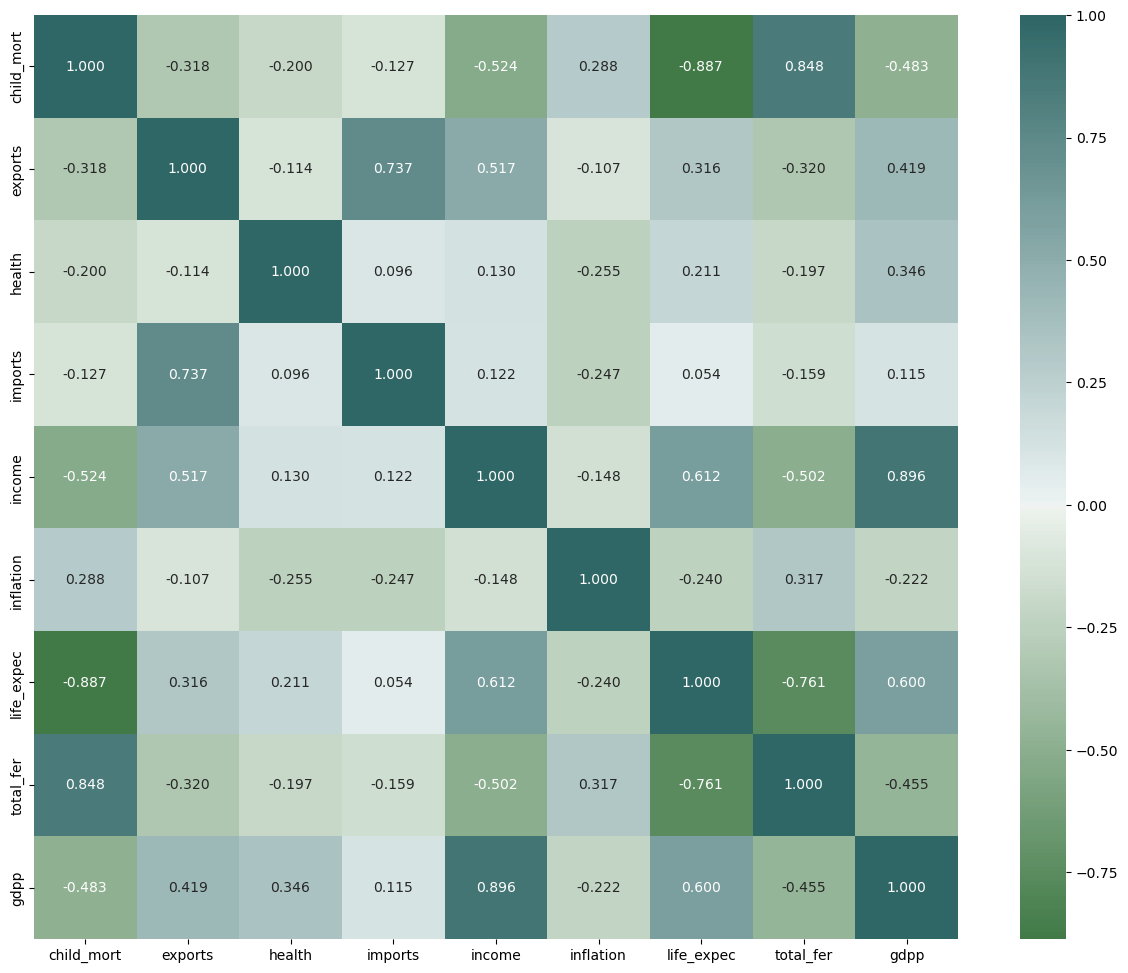

In [11]:
dataset2 = dataset.corr()
plt.figure(figsize=(16,12))

cmap = sns.diverging_palette(850, 190, s=75, l=40, n=9, center="light", as_cmap=True)
_ = sns.heatmap(dataset2, center=0, annot=True, fmt='.3f', square=True, cmap=cmap)

In [12]:
dataset.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

Однофакторний аналіз:

<AxesSubplot:xlabel='health', ylabel='Count'>

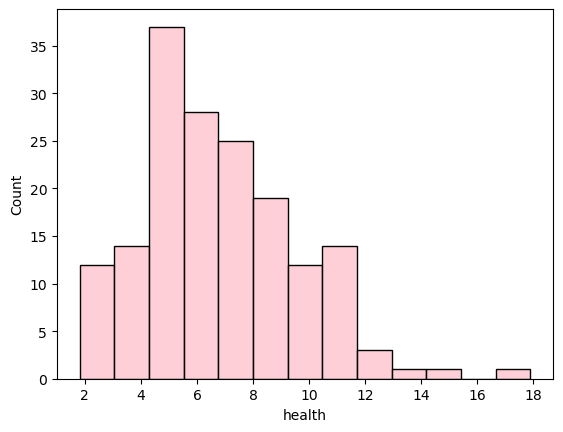

In [13]:
sns.histplot(x=dataset['health'], color = 'pink')

<AxesSubplot:xlabel='gdpp', ylabel='Count'>

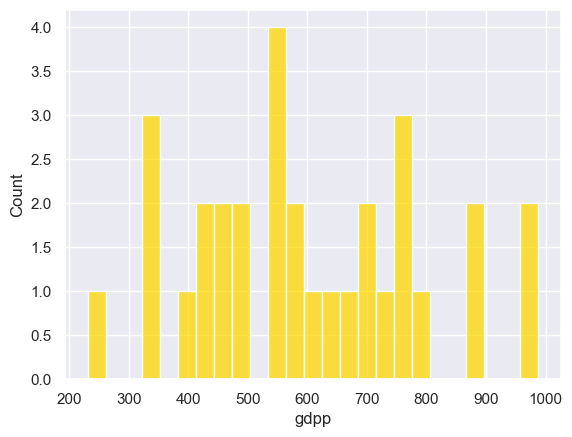

In [14]:
health_stat = dataset[dataset['gdpp'] < 1000]
sns.set(style="darkgrid")
sns.histplot(data=health_stat, x='gdpp', color="gold", bins = 25)

<AxesSubplot:ylabel='inflation'>

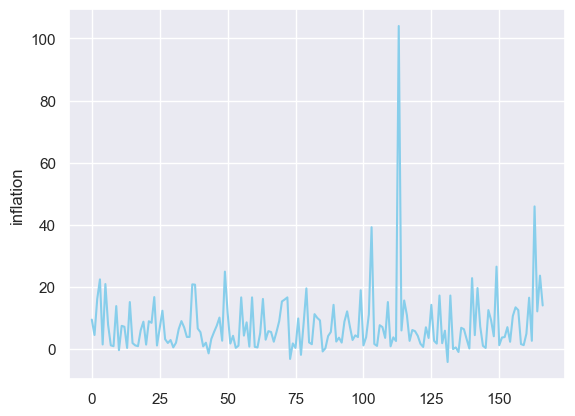

In [15]:
inf_data = dataset['inflation']
sns.set(style="darkgrid")
sns.lineplot(data=inf_data, color="skyblue")

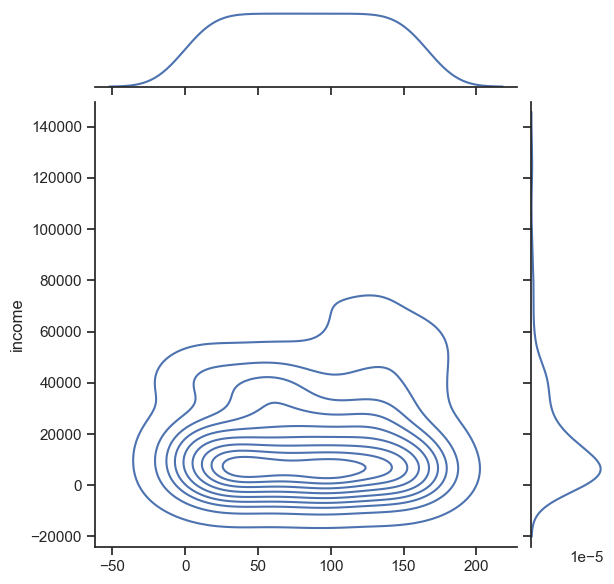

In [24]:
sns.set(style="darkgrid")
sns.set_theme(style="ticks")
sns.jointplot(data=dataset['income'],kind="kde")

<AxesSubplot:ylabel='exports'>

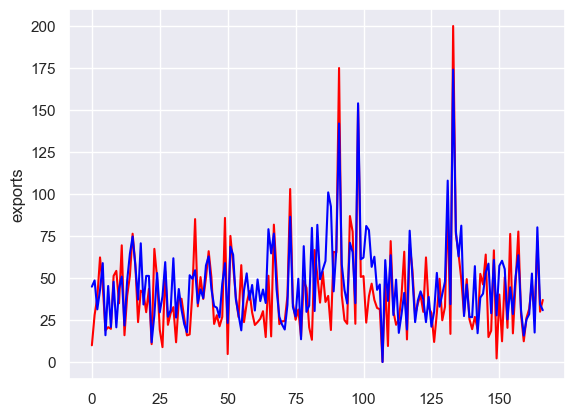

In [26]:
sns.set(style="darkgrid")
sns.lineplot(data=dataset['exports'], color="red")
sns.lineplot(data=dataset['imports'], color="blue")

<AxesSubplot:ylabel='total_fer'>

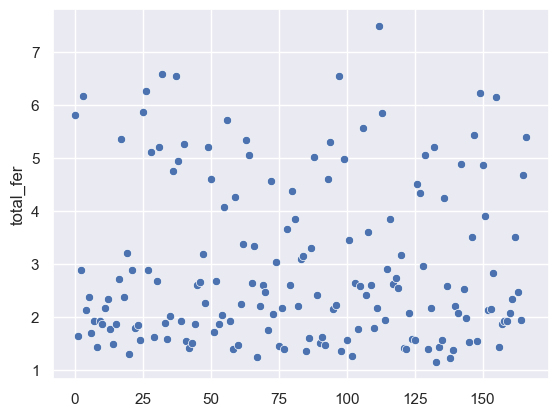

In [30]:
sns.set_theme(style="darkgrid")

sns.scatterplot(data=dataset['total_fer'])

Двофакторний аналіз:

<AxesSubplot:xlabel='exports', ylabel='gdpp'>

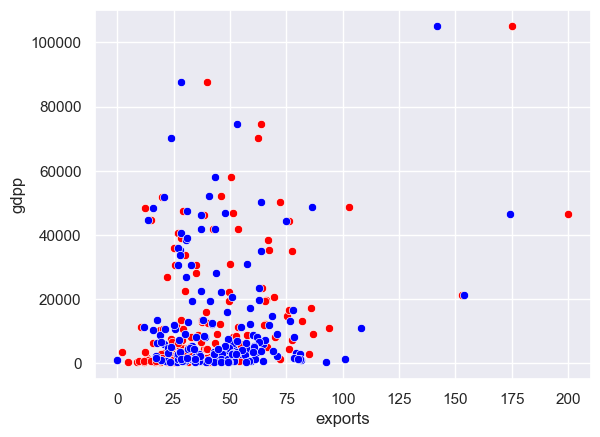

In [36]:
sns.set(style="darkgrid")
sns.scatterplot(data=dataset, x = dataset['exports'], y =dataset['gdpp'] , color="red")
sns.scatterplot(data=dataset, x = dataset['imports'], y =dataset['gdpp'] , color="blue")

<AxesSubplot:xlabel='child_mort', ylabel='life_expec'>

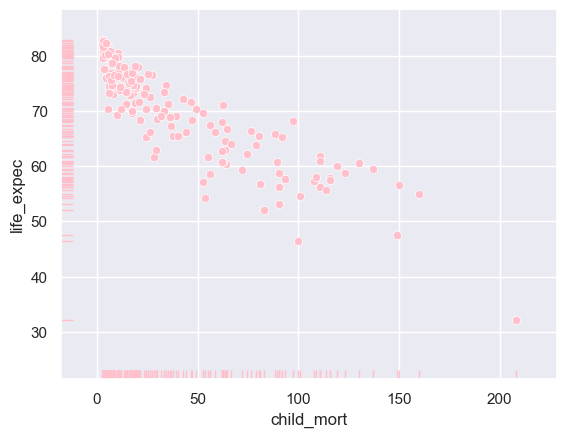

In [38]:
sns.scatterplot(data = dataset, x = "child_mort", y = "life_expec", color = 'pink')
sns.rugplot(data = dataset, x = "child_mort", y = "life_expec", color = 'pink')

<AxesSubplot:xlabel='health', ylabel='income'>

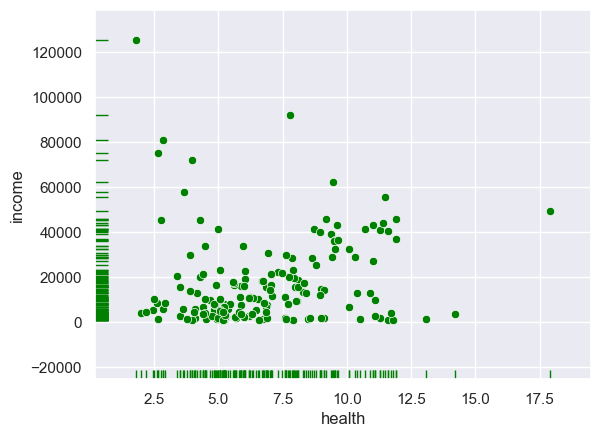

In [39]:
sns.scatterplot(data = dataset, x = "health", y = "income", color = 'green')
sns.rugplot(data = dataset, x = "health", y = "income", color = 'green')

<AxesSubplot:xlabel='health', ylabel='life_expec'>

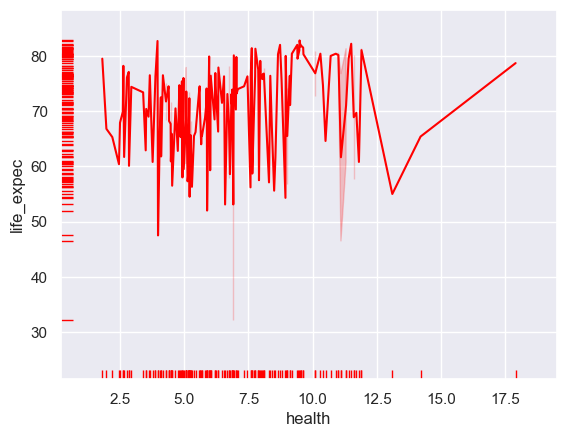

In [44]:
sns.lineplot(data = dataset, x = "health", y = "life_expec", color = 'red')
sns.rugplot(data = dataset, x = "health", y = "life_expec", color = 'red')

Викиди:

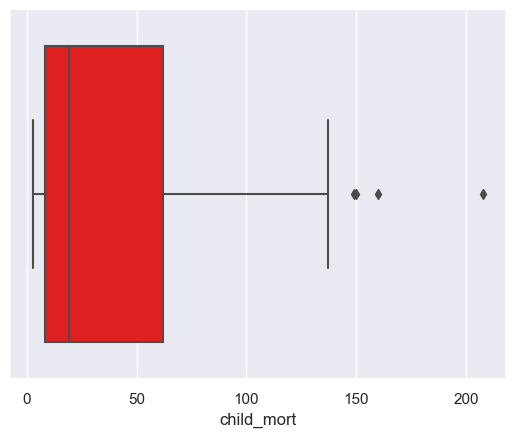

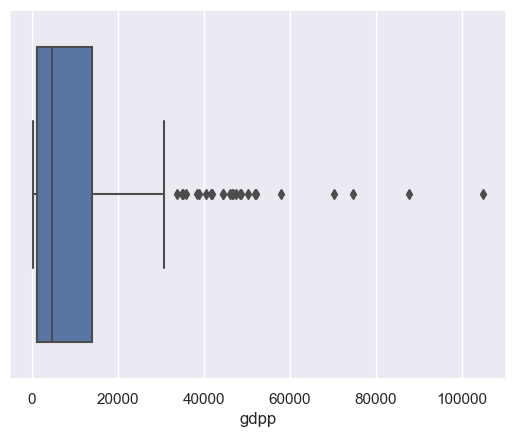

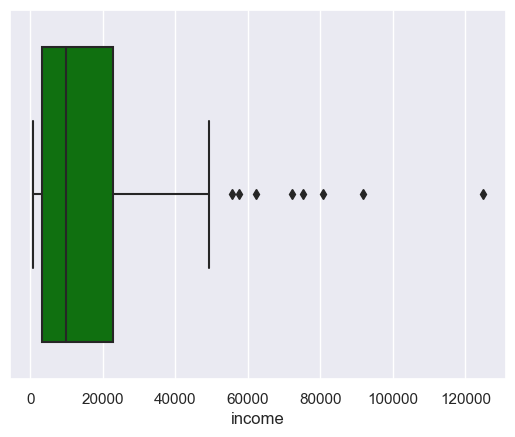

In [90]:
figure1 = plt.figure()
sns.boxplot(x=dataset['child_mort'], color='red')
plt.show()

sns.boxplot(x=dataset['gdpp'])
plt.show()

sns.boxplot(x=dataset['income'],color='green')
plt.show()


In [91]:
newdata = dataset[["country",'gdpp','child_mort','income']]
newdata = newdata[newdata['gdpp'] < 30000]
newdata = newdata[newdata['child_mort'] < 140]
newdata = newdata[newdata['income'] < 50000]
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 166
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     135 non-null    object 
 1   gdpp        135 non-null    int64  
 2   child_mort  135 non-null    float64
 3   income      135 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.3+ KB


Кластерізація:

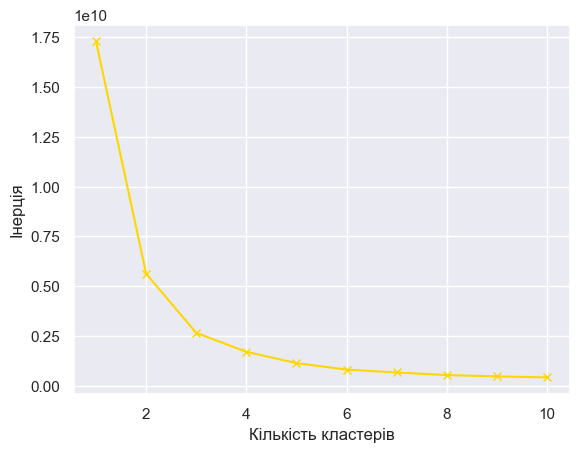

In [92]:
import warnings
warnings.filterwarnings('ignore')
clust = list(zip(newdata["gdpp"], newdata["income"]))
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(clust)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='x', color = 'gold')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()


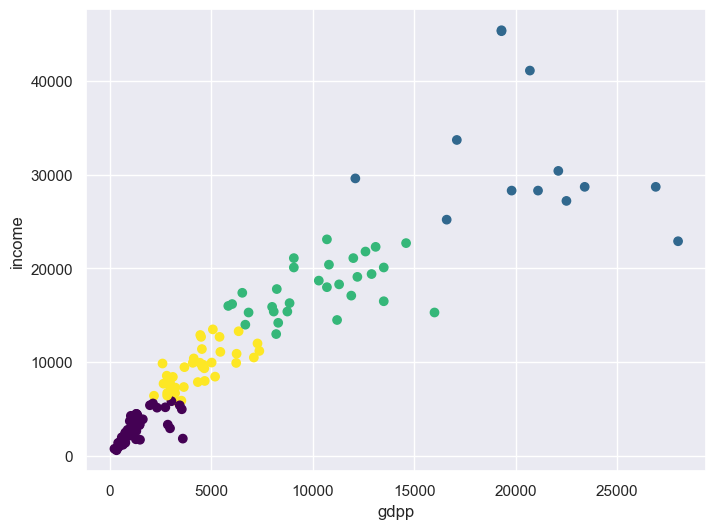

In [93]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(clust)
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(newdata["gdpp"], newdata["income"], c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('gdpp')
ax.set_ylabel('income')
plt.show()


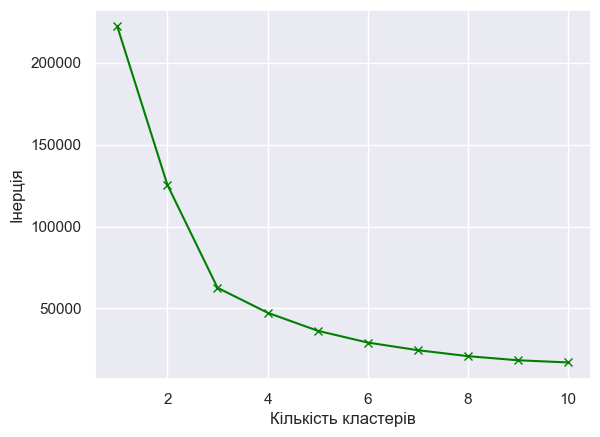

In [53]:
clust2 = list(zip(dataset["imports"], dataset["exports"]))
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(clust2)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='x', color = 'green')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()

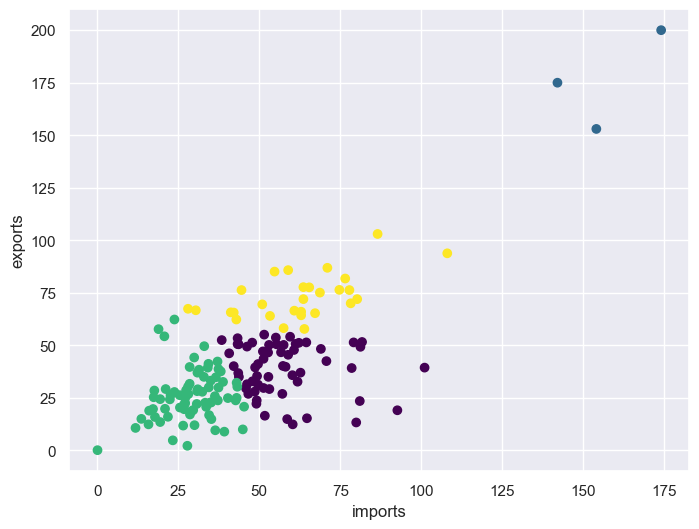

In [95]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(clust2)
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(dataset["imports"], dataset["exports"], c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('imports')
ax.set_ylabel('exports')
plt.show()

In [78]:
cl = dataset[['child_mort', 'income']].copy()
from sklearn.mixture import GaussianMixture
n_clusters = 4
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(cl)
cluster_labels = gmm_model.predict(cl)
cl = pd.DataFrame(cl)
cl['cluster'] = cluster_labels

In [79]:
cl

,child_mort,income,cluster
0,90.20,1610,0
1,16.60,9930,1
2,27.30,12900,1
3,119.00,5900,0
4,10.30,19100,3
...,...,...,...
162,29.20,2950,0
163,17.10,16500,1
164,23.30,4490,1
165,56.30,4480,0


Text(0.5, 0, 'income')

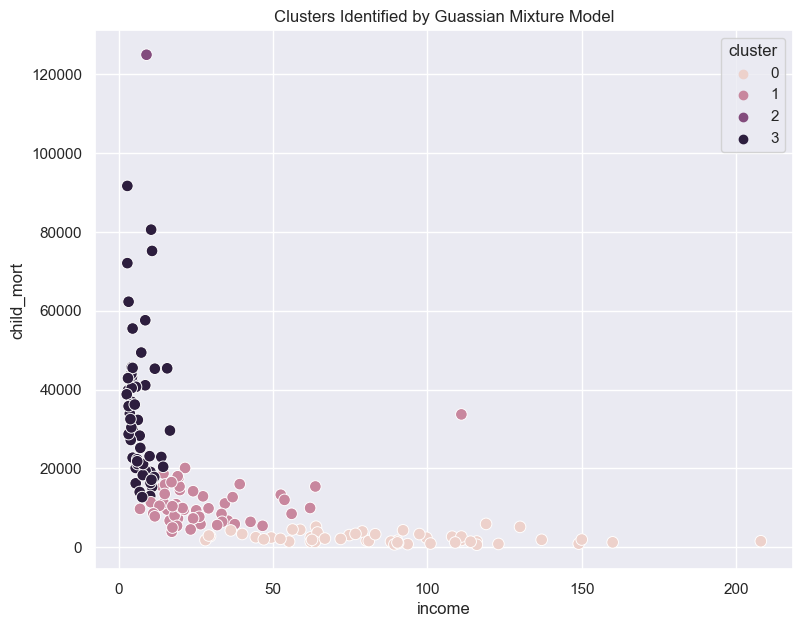

In [80]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.scatterplot(x='child_mort', y='income', data=cl, hue='cluster', s=70, ax = ax) 
plt.title('Clusters Identified by Guassian Mixture Model')
plt.ylabel('child_mort')
plt.xlabel('income')

In [85]:
dat = dataset[["country"]]
worst=pd.merge(dat,cl, left_index=True,right_index=True)

worst.nsmallest(10, ['income', 'child_mort'])


,country,child_mort,income,cluster
37,"Congo, Dem. Rep.",116.00,609,0
88,Liberia,89.30,700,0
26,Burundi,93.60,764,0
112,Niger,123.00,814,0
31,Central African Republic,149.00,888,0
106,Mozambique,101.00,918,0
94,Malawi,90.50,1030,0
63,Guinea,109.00,1190,0
150,Togo,90.30,1210,0
132,Sierra Leone,160.00,1220,0


In [87]:
dat = dataset[["country"]]
best=pd.merge(dat,cl, left_index=True,right_index=True)

best.nlargest(10, ['income', 'child_mort'])

,country,child_mort,income,cluster
123,Qatar,9.00,125000,2
91,Luxembourg,2.80,91700,3
23,Brunei,10.50,80600,3
82,Kuwait,10.80,75200,3
133,Singapore,2.80,72100,3
114,Norway,3.20,62300,3
157,United Arab Emirates,8.60,57600,3
145,Switzerland,4.50,55500,3
159,United States,7.30,49400,3
73,Ireland,4.20,45700,3
